## Exercise 2: Linear Regression via Normal Equations (10 Points)
In this exercise you will implement (multiple) linear regression using 
Normal Equations. See lecture (slides: 2-15) ml-02-A1-linear-reg.
The learning algorithm is given on the slide 9.

### 1. Download the dataset http://jgscott.github.io/teaching/r/house/house.csv
Load it as Xdata  [Hint:] from loaded data you need to separate ydata i.e. sales prices of houses,  which is your target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Titles home nbhd offers sqft brick bedroms bathrooms
data = pd.read_csv('http://jgscott.github.io/teaching/r/house/house.csv', index_col=0)
f = data

In [5]:
f.head()

,nbhd,offers,sqft,brick,bedrooms,bathrooms,price
home,,,,,,,
1,nbhd02,2,1790,No,2,2,114300
2,nbhd02,3,2030,No,4,2,114200
3,nbhd02,1,1740,No,3,2,114800
4,nbhd02,3,1980,No,3,2,94700
5,nbhd02,3,2130,No,3,3,119800


### 2. Choose those columns, which can help you in prediction i.e. contain some useful information. 
You can drop irrelevant columns. Give reason for choosing or dropping any column.

### 3. Split your dataset Xdata, ydata into Xtrain , ydata and Xtest , ytest 
You can randomly assign 80% of the data to a Xtrain , ytrain set and remaining
20% to a Xtest , ytest set.

In [5]:
msk = np.random.rand(len(f)) < 0.8  #Random assign
train = f[msk]
test = f[~msk]

Xtrain = np.array([train['sqft'], train['bedrooms'], train['bathrooms']]).T
Xtest  = np.array([test['sqft'], test['bedrooms'], test['bathrooms']]).T
Ytrain = np.array([train['price']]).T
Ytest  = np.array([test['price']]).T

### 4. Implement learn-linreg-NormEq algorithm and learn a parameter vector β  using Xtrain set. 
You have to learn a model to predict sales price of houses i.e. , ytest .

####                      Linear Regresion using Normal Equations
<img src ="LinREgNormalEq.png"/>

In [6]:
A = np.vstack([Xtrain.T, np.ones(len(Xtrain))]).T
XtX = np.dot(A.T,A)
XtY = np.dot(A.T,Ytrain)
Betas = np.dot(np.linalg.inv(XtX),XtY)
print ("XtX is:")
print (XtX)
print ("XtY is:")
print (XtY)
print( "Values of betas are:")
print (Betas)

XtX is:
[[  4.33053400e+08   6.60750000e+05   5.34360000e+05   2.14080000e+05]
 [  6.60750000e+05   1.05400000e+03   8.22000000e+02   3.26000000e+02]
 [  5.34360000e+05   8.22000000e+02   6.80000000e+02   2.64000000e+02]
 [  2.14080000e+05   3.26000000e+02   2.64000000e+02   1.07000000e+02]]
XtY is:
[[  2.87354260e+10]
 [  4.43829000e+07]
 [  3.57590000e+07]
 [  1.41750000e+07]]
Values of betas are:
[[    46.82653003]
 [  9843.01350333]
 [ 11270.32982321]
 [-19007.59835313]]


### 5. Line 6, in learn-linreg-NormEq uses SOLVE-SLE. You have to replace SOLVE-SLE following options. For each option you will learn a separate set of parameters.
    (a) Gaussian elimination
    (b) Cholesky decomposition
    (c) QR decomposition

### Gaussian Elimination

In [8]:
#The method of np.linalg.solve(), uses gaussian elimination
GaussBetas = np.linalg.lstsq(A, Ytrain)[0]
print ("Betas from Gauss method are:")
print (GaussBetas)             

Betas from Gauss method are:
[[    46.82653003]
 [  9843.01350333]
 [ 11270.32982321]
 [-19007.59835313]]


### QR Decomposition

In [9]:
# QR Decomposition
q, r = np.linalg.qr(XtX)
s1 = np.dot(q.T,XtY)
BetasQR = np.dot(np.linalg.inv(r),s1)

print('q Matrix is:')
print(q)
print('r Matrix is:')
print(r)
print('Betas of QR method are:')
print(BetasQR)

q Matrix is:
[[ -9.99997952e-01   1.68072679e-03   1.00033123e-03  -5.19136329e-04]
 [ -1.52579023e-03  -9.89457692e-01   1.44183247e-01   1.35033112e-02]
 [ -1.23393306e-03  -1.44147920e-01  -9.89549442e-01   3.42885946e-03]
 [ -4.94349107e-04   1.38574374e-02   1.44673462e-03   9.99902812e-01]]
r Matrix is:
[[ -4.33054287e+08  -6.60751431e+05  -5.34361130e+05  -2.14080438e+05]
 [  0.00000000e+00  -4.63202443e+01  -9.58327566e+00   6.74479245e-01]
 [  0.00000000e+00   0.00000000e+00  -1.94560549e+01   6.83972179e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.16019398e+00]]
Betas of QR method are:
[[    46.82653003]
 [  9843.01350333]
 [ 11270.32982321]
 [-19007.59835313]]


## Cholesky

In [11]:
L = np.linalg.cholesky(XtX)
Y1 = np.dot(np.linalg.inv(L),XtY)
BetasCholesky = np.dot(np.linalg.inv(L.T),Y1)
print (BetasCholesky)

[[    46.82653003]
 [  9843.01350333]
 [ 11270.32982321]
 [-19007.59835313]]


RMSE = 18273.17348


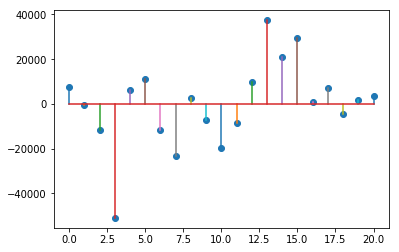

In [12]:
Atest = np.vstack([Xtest.T, np.ones(len(Xtest))]).T
RMSE =(np.sum((Ytest - np.dot(Atest,np.linalg.lstsq(Atest, Ytest)[0]))**2)/len(Ytest))**0.5
print ("RMSE =", RMSE)
plt.stem(Ytest - np.dot(Atest,np.linalg.lstsq(Atest, Ytest)[0]), '')
plt.show()